# I. Overview
In this problem, we will together predict house prices in a city of Boston in the US with a sample size of 506 values ​​with 13 attributes as follows:
```
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)ˆ2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
```
With this information, together, we will proceed to build a hypothetical linear regression model based on `numpy` and `tensorflow` to derive house prices based on up to 10 properties.

# II. Data Collection

In [2]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

x = load_boston().data
y = load_boston().target

# Split it into train and test subsets.
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 23)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

For simplicity, the input data consists of only two characteristics:
```
    - INDUS proportion of non-retail business acres per town
    - RM average number of rooms per dwelling
```

In [4]:
x = load_boston().data[:,[2,5]]
y = load_boston().target

# Split it into train and test subsets.
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=87)
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

To understand more about the data set, we can do some more illustrations as follows:


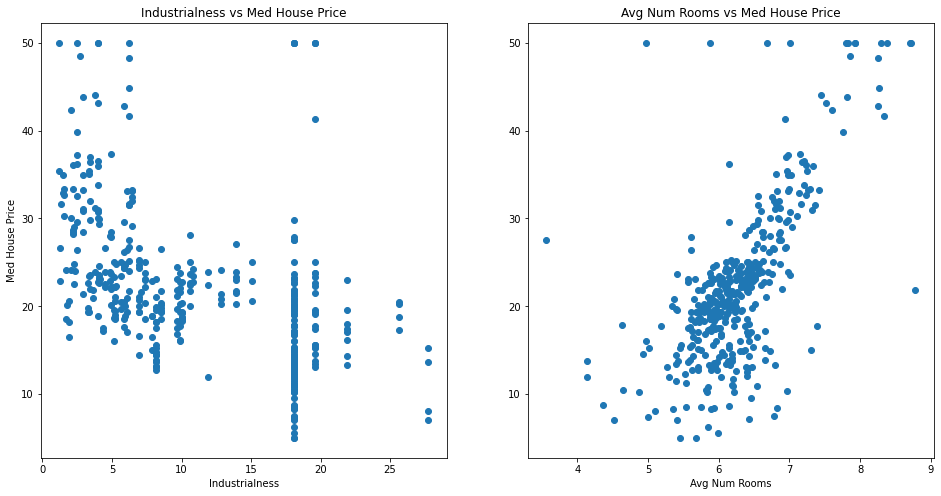

In [5]:
fig = plt.figure(figsize = (16, 8))
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

fig1.scatter(train_X[:, 0], train_y)
fig1.set_title("Industrialness vs Med House Price")
fig1.set_xlabel("Industrialness")
fig1.set_ylabel("Med House Price")

fig2.scatter(train_X[:,1], train_y)
fig2.set_title("Avg Num Rooms vs Med House Price")
fig2.set_xlabel("Avg Num Rooms")
#fig2.set_ylabel("Med House Price")
plt.savefig("INDUSwRM")

Currently, our vector has the following form:

In [6]:
print("Size of data X train matrix %s"  % str(train_X.shape))
print("Size of data Y train array %s"  % str(train_y.shape))
print("Size of data X test matrix %s"  % str(test_X.shape))
print("Size of data Y test array %s"  % str(test_y.shape))

Size of data X train matrix (404, 2)
Size of data Y train array (404,)
Size of data X test matrix (102, 2)
Size of data Y test array (102,)


In [7]:
one_column_train = np.ones((train_X.shape[0], 1))
train_X_new = np.append(one_column_train, train_X, axis = 1) # Add bias

one_column_test = np.ones((test_X.shape[0], 1))
test_X_new = np.append(one_column_test, test_X, axis = 1)

In [8]:
print("Size of data X train matrix %s"  % str(train_X_new.shape))
print("Size of data Y train array %s"  % str(train_y.shape))
print("Size of data X test matrix %s"  % str(test_X_new.shape))
print("Size of data Y test array %s"  % str(test_y.shape))

Size of data X train matrix (404, 3)
Size of data Y train array (404,)
Size of data X test matrix (102, 3)
Size of data Y test array (102,)


# III. Write a cost function
$$J(w) = \frac{1}{m} \sum_{i=1}^m loss(\hat{y}^{(i)}, y^{(i)})= \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})^2 $$
Expanding, we have the result:
$$J(w) = \frac{1}{2m} \sum_{i=1}^m (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b - y^{(i)})^2 $$

### III.1 Write a program

In [9]:
def np_cost(w, X, y):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `y`, at weights `w` and `b`.
    
    X: 2D array dataset that has (m, n) dimension. 
    y: list of targets that has (n, ) dimension.
    w: list of weights that has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    cost = 0
    m = X.shape[0]
    for i in range(m):
        
        y_hat = w[0]*X[i,0] + w[1]*X[i, 1] + w[2]*X[i, 2]  # hypothesis
        cost += (y_hat - y[i])**2 # sum cost of each data point.
        
    return cost/(2*m)

### III.2 Try this

In [10]:
np_cost([20, 3, 5], train_X_new, train_y) # 2198.1440481435648

2232.6783646967824

In [11]:
np_cost([0, 3, 5], train_X_new, train_y) # 1163.1688006188117

1186.0375231126243

# IV. Vectorize the cost function
Alternatively, we can also rewrite the above formula as follows:
$$J(w) = \frac{1}{2m} \| X w + b  - y \|^2$$ 

### IV.1 Write a program

In [12]:
def np_cost_vectorized(w, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w` and `b`.
    
    X: dataset matrix has (m, n) dimension. 
    y: targets vector has (n, ) dimension.
    w: weights vector has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    m = X.shape[0] # number of samples in dataset
    w = np.array(w) # convert to numpy array
    y_hat = np.dot(X, w) # hypothesis
    
    return np.sum((y_hat - y)**2)/(2*m)

### IV.2 Try this

In [13]:
np_cost_vectorized([20, 3, 5], train_X_new, train_y) # 2198.1440481435643

2232.6783646967824

In [14]:
np_cost_vectorized([0, 3, 5], train_X_new, train_y) # 1163.168800618812

1186.0375231126238

# IV. Calculate gradient vector of w
With $i = 1...m $ and $j = 1...n$:

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m x_j^{(i)}(\hat{y}^{(i)}-y^{(i)}) $$



### IV.1 Write a program with `for`

In [15]:
def np_grad_fn(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    grad_w = np.zeros(np.array(w).shape)
    m = X.shape[0]
    y_hat = np.dot(X, w)
    for j in range(grad_w.shape[0]):
        for i in range(m):
            grad_w[j] += (y_hat[i] - y[i])*X[i, j]/m
    return grad_w

### IV.2 Try this

In [16]:
w = [0.1, 0.2, 0.3]

np_grad_fn(w, train_X_new, train_y)

# array([ -17.94781361, -161.77719027, -116.62229795])

array([ -17.94781361, -161.77719027, -116.62229795])

# IV. Write a program in vectorized form
$$\nabla J(w) = \frac{1}{m} X^T \left(Xw - y \right)$$ 

In [17]:
def np_grad_fn_vectorized(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    m, n = X.shape
    y_hat = np.dot(X, w)
    grad_w = np.dot(X.T, y_hat - y)/m
    
    return grad_w

In [18]:
w = [0.1, 0.2, 0.3]
np_grad_fn_vectorized(w, train_X_new, train_y)

# array([ -17.94781361, -161.77719027, -116.62229795])

array([ -17.94781361, -161.77719027, -116.62229795])

# V. Calculate based on Gradient Descent
Approximately $w$:
$$ w_j = w_j - \alpha * \frac{\partial J}{\partial w_j}$$
### V.1. Programming


In [19]:
def np_solve_via_gradient_descent(X, y, print_every=5000,
                                  niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (m, n+1) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    m, n = X.shape
    # initialize all the weights to zeros
    w = np.zeros((n,))
    for k in range(niter):
        
        dw = np_grad_fn_vectorized(w, X, y) 
        w = w - alpha*dw
        
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w

In [20]:
opt_w = np_solve_via_gradient_descent(train_X_new, train_y, niter=500000)

Weight after 0 iteration: [0.11068564 1.08378568 0.71326905]
Weight after 5000 iteration: [-3.82551279 -0.47289339  5.0091591 ]
Weight after 10000 iteration: [-7.41968638 -0.44671745  5.53222819]
Weight after 15000 iteration: [-10.31907467  -0.42560155   5.95418343]
Weight after 20000 iteration: [-12.65798576  -0.40856754   6.29457102]
Weight after 25000 iteration: [-14.54476481  -0.39482635   6.5691587 ]
Weight after 30000 iteration: [-16.0668129   -0.38374145   6.79066618]
Weight after 35000 iteration: [-17.29463574  -0.37479936   6.96935431]
Weight after 40000 iteration: [-18.28510965  -0.36758586   7.11350046]
Weight after 45000 iteration: [-19.08411625  -0.36176679   7.22978189]
Weight after 50000 iteration: [-19.72866787  -0.3570726    7.3235851 ]
Weight after 55000 iteration: [-20.248622    -0.35328583   7.39925533]
Weight after 60000 iteration: [-20.66806444  -0.35023108   7.46029784]
Weight after 65000 iteration: [-21.00642497  -0.34776684   7.5095403 ]
Weight after 70000 iter

In [21]:
opt_w # array([-22.41842742,  -0.3374834 ,   7.71503255])


array([-22.41842742,  -0.3374834 ,   7.71503255])

In [22]:
print("Training cost:", np_cost_vectorized(opt_w, train_X_new, train_y)) # Training cost: 18.90049122519828

Training cost: 18.90049122519828


In [23]:
print("Testing cost:", np_cost_vectorized(opt_w, test_X_new, test_y)) # Testing cost: 22.371460612916348

Testing cost: 22.371460612916348
